# LAP - Aufgabenserie 12

## Aufgabe 1 - Clustering - schrittweise
Die folgenden Schritte und die Idee stammt von hier: https://freecontent.manning.com/clustering-data-into-groups-part-1/. Im Folgenden wird der Algorithmus veranschaulicht. Gehe die
einzelnen Schritte durch und versuche sie zu verstehen.

-	Listing 1. Modeling dart coordinates using two normal distributions
-	Listing 2. Simulating randomly thrown darts
-	Listing 3. Assigning darts to the nearest bull’s-eye
-	Listing 4. Coloring darts based on the nearest bull’s-eye
-	Listing 5. Assigning darts to randomly chosen centers
-	Listing 6. Assigning darts to centers based on means
-	Listing 7. Adjusting bull’s-eye positions over 10 iterations


#### Listing 1: Modeling dart coordinates using two normal distributions

In [37]:
import numpy as np                              # Abschnitt 1
import matplotlib.pyplot as plt                 # Abschnitt 2
from scipy.spatial.distance import euclidean    # Abschnitt 3

np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


#### Listing 2: Simulating randomly thrown darts

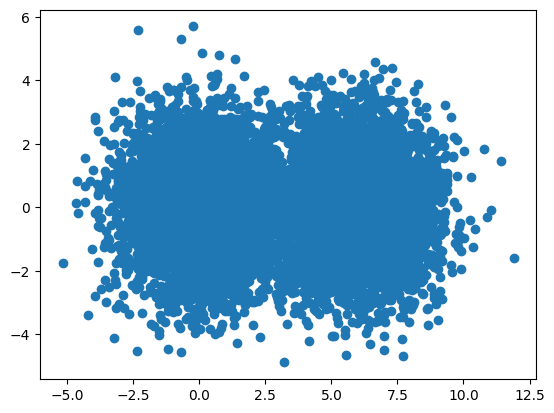

In [38]:
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range(5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)
  
plt.scatter(x_coordinates, y_coordinates)
plt.show()

#### Listing 3: Assigning darts to the nearest bull’s-eye

In [39]:
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)
  
darts = [[0,1], [6, 1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at position {dart} is closest to bulls-eye {index}")

The dart at position [0, 1] is closest to bulls-eye 0
The dart at position [6, 1] is closest to bulls-eye 1


#### Listing 4: Coloring darts based on the nearest bull’s-eye

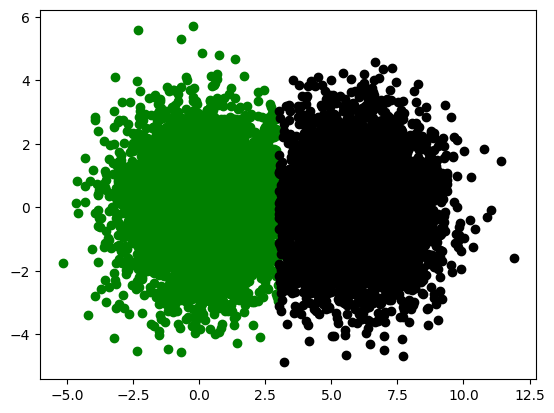

In [40]:
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                           if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates,
                     color=['g', 'k'][bs_index])
    plt.show()
  
darts = [[x_coordinates[i], y_coordinates[i]]
          for i in range(len(x_coordinates))]
color_by_cluster(darts)

#### Listing 5: Assigning darts to randomly chosen centers

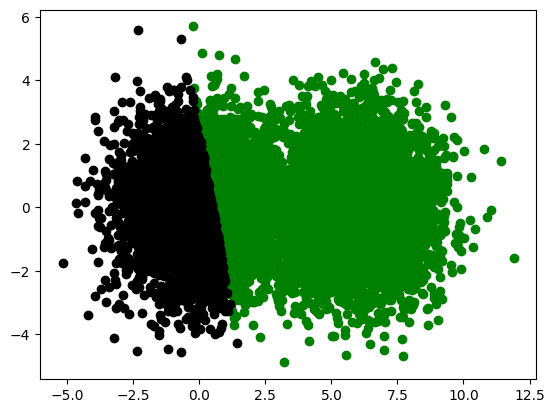

In [41]:
# ------------------ Listing 5 ------------------
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

#### Listing 6: Assigning darts to centers based on means

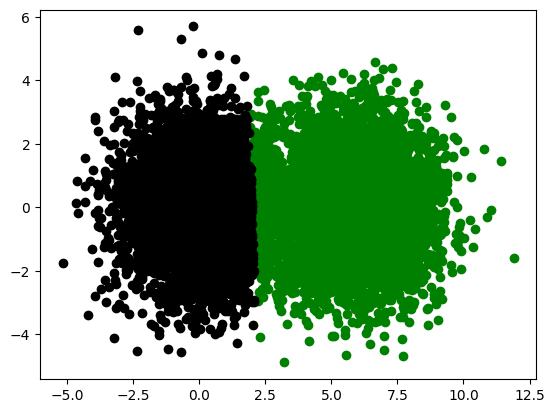

In [42]:
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts))
                           if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)
  
    return updated_bulls_eyes
  
bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)

#### Listing 7: Adjusting bull’s-eye positions over 10 iterations

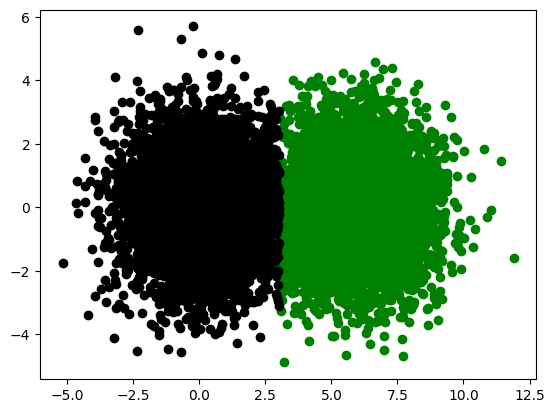

In [43]:
# schrittweise Darstellung
#for i in range(10):
#    bulls_eyes = update_bulls_eyes(darts)
#    color_by_cluster(darts)

# oder nur als gesamter Fortschritt dargestellt
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)
    
color_by_cluster(darts)

## Aufgabe 2 - Körpergrössen und -Massen
Anhand des folgenden Datensatzes soll mit dem k-means-Algorithmus die Zuteilung in zwei Cluster vorgenommen werden. Es sind als Vorgabe zwei Cluster (0: Männer und 1: Frauen) gegeben. Die Daten beinhalten Körpergrössen und Gewichtsangaben von Frauen und Männern. Dieser Algorithmus ist universell einsetzbar. Das heisst du kannst auch andere Daten damit klassifizieren.

__Hinweis__: Allenfalls musst du zuerst das Paket [scikit-learn](https://scikit-learn.org/stable/) mit `pip install scikit-learn` installieren, damit du den Befehl mit `from sklearn import cluster as sk_cluster` importieren und verwenden kannst.

__Daten__: Verwende die folgenden Eingabedaten: _daten-ein-12-2.csv_. Gib die Ausgabedaten, also das Resultat der Clusteranalyse in eine Exceldatei mit dem Namen: _daten-aus-12-2-cluster.xlsx_ aus. Die Exceldatei kannst du mit dem Modul [pandas](https://pandas.pydata.org/docs/) erstellen: 

```
with pd.ExcelWriter(datei_name_aus) as writer:
    daten.to_excel(writer)
```
Vorausgesetzt, dass du die Bibliothek mit: `import pandas as pd` importierst. Verändere deine Parameter und beobachte, wie sich das Resultat entsprechend ändert.

### K-Means Algorithmus
-   Idee: Ein centroid-basierter Algorithmus, der Datenpunkte in k Cluster gruppiert.
-   Ziel: Minimierung der Summe der quadrierten Abstände zwischen Datenpunkten und ihren zugewiesenen Clusterzentren.
-   Ablauf: 
    -   (1) Initialisiere k Zentroiden (Mittelpunkte) zufällig. 
    -   (2) Weise jeden Punkt dem nächstgelegenen Zentroid zu.
    -   (3) Aktualisiere die Zentroiden als Mittelwert der zugehörigen Punkte.
    -   (4) Wiederhole die Schritte 2 und 3, bis sich die Zentroiden nicht mehr ändern oder ein Abbruchkriterium erfüllt ist.
-   Stärken:
    -   Effizient bei grossen Datenmengen.
    -   Einfach zu implementieren.
-   Schwächen:
    -   Die Anzahl der Cluster k muss im Voraus bekannt sein.
    -   Nicht robust gegenüber Ausreissern.
    -   Funktioniert schlecht bei nicht-konvexen oder ungleichmässig dichten Clustern. Ein Cluster ist konvex, wenn jede gerade Verbindungslinie zwischen zwei Punkten im Cluster vollständig innerhalb des Clusters liegt. Beispiele für konvexe Cluster sind Kreise, Ellipsen oder rechteckige Regionen. Ein Cluster ist nicht-konvex, wenn diese Bedingung verletzt wird, z. B. bei gebogenen, langgezogenen oder ringförmigen Strukturen.

Quelle: chatGPT 4.0, 2024.12

#### a) Berechnung der Zentroide und Cluster

In [1]:
## hier deinen Code eingeben...


#### b) Visualisierung der Daten und Cluster mit einem Scatterplot
Für den Scatterplot kannst du den Befehl `sns.scatterplot()` verwenden, sofern du die Bibliothek mit `import seaborn as sns` vorgängig importierst.
Natürlich gibt es auch die Möglichkeit mit dem Befehl `plt.scatter()`aus der Bibliothek `matplotlib.pyplot` zu arbeiten.

In [2]:
## hier deinen Code eingeben...


Bemerkungen:
-   __Frauen__: Man erkennt im Scatterplot die blau eingefärbten Kreuze und Kreise als Frauen. Der Algorithmus hat nicht bei allen Datenpunkten die richtige Klassifizierung oder Zuordnung vorgenommen. Diejenigen Frauen, die als blaue Kreise eingezeichnet sind, sind eigentlich Männer.
-   __Männer__: Analog erkennt man im Scatterplot die orange eingefärbten Kreise und Kreuze als Männer. Der Algorithmus hat nicht bei allen Datenpunkten die richtige Klassifizierung oder Zuordnung vorgenommen. Diejenigen Männer, die als orange Kreuze eingezeichnet sind, sind eigentlich Frauen.
Für eine detaillierte Untersuchung kannst du dir die generierte Ausgabedatei _Daten/daten-aus-12-2-cluster.xlsx_ anschauen.

## Aufgabe 3 - DBSCAN mit Daten-Blobs

Der Unterschied von diesem Algorithmus zum k-Means-Algorithmus liegt darin, dass wir keine Anzahl Cluster vorgeben müssen. Diese findet der Algorithmus selber heraus.

Was wir aber vorgeben müssen, sind 
*  die __Epsilonumgebungen__ (Radien), mit welchen wir anschliessend weitere sogenannte _Randpunkte_ "einfangen" und einem _Kernpunkt_ zuordnen respektive als ein Cluster zusammenfassen.
*  die Anzahl __Randpunkte__, welche einem _Kernpunkt_ zugeordnet und so zu einem Cluster zusammengafasst werden.

Es gibt auch noch sogenannte _Rauschpunkte_ (Noise). Diese sind keinem Cluster zugeordnet. Der DBSCAN-Algorithmus (Density-Based Spatial Clustering of Applications with Noise) ist ein weitverbreiteter dichtebasierter Clusteralgorithmus.

Aus `sklearn.datasets` wollen wir Daten mit `make_blobs()` generieren, welche anschliessend in unserer Clusteranalyse verwendet werden sollen. __make_blobs__ generiert zufällige Punktwolken, welche unsere zu erkennenden Cluster darstellen. Dabei müssen die Anzahl Punkte und die Anzahl Cluster vorgegeben werden. 

Es soll ein Pythonprogramm solche Punktwolken: _blobs_ generieren, visuell darstellen und anschliessend durch den DBScan-Algorithmus die Cluster automatisch erkennen. Verändere auch hier deine Parameter und beobachte, wie sich das Resultat entsprechend ändert.

### DBSCAN Algorithmus
-   Idee: Ein dichtebasierter Algorithmus, der Cluster durch Dichteregionen erkennt. Identifiziert Outlier, die nicht zu dichten Regionen gehören. 
-   Parameter:
    -   eps (epsilon): Maximale Distanz zwischen zwei Punkten, um als "benachbart" zu gelten.
    -   min_samples (randpunkte): Minimale Anzahl von Punkten, um eine Region als Cluster zu definieren.
-   Ablauf:
    -   Starte mit einem beliebigen Punkt.
    -   Bestimme die Nachbarn des Punkts innerhalb von eps.
    -   Falls die Nachbarnanzahl ≥ min_samples, definiere einen Cluster.
    -   Wiederhole diesen Prozess rekursiv für Nachbarn.
    -   Punkte, die keiner dichten Region angehören, werden als Outlier markiert.
-   Stärken:
    -   Erkennt Cluster beliebiger Form.
    -   Robuster gegenüber Ausreissern.
-   Schwächen:
    -   Parameter eps und min_samples können schwer zu wählen sein. 
    -   Kann bei Daten mit stark variierenden Dichten problematisch sein.

Quelle: chatGPT 4.0, 2024.12

In [3]:
## hier deinen Code eingeben...


## Aufgabe 4 - Daten mit Hilfe von `make_moons`
### a) mit k-means-Algorithmus

- **Importanweisungen:**  
  Zuerst werden die notwendigen Module geladen:  
  - Matplotlib für die Erstellung von Diagrammen,  
  - eine Funktion mit `from sklearn.datasets import make_moons` zur Erzeugung eines halbmondförmigen, synthetischen Datensatzes und 
  - mit `from sklearn.cluster import KMeans` der K-Means-Algorithmus für die Clusteranalyse.

- **Datengenerierung:**  
  Es wird ein Datensatz mit 300 Punkten erzeugt, bei dem ein leichtes Rauschen hinzugefügt wird. Der Parameter für den Zufallszustand stellt sicher, dass die Ergebnisse bei jedem Ausführen gleich sind.

- **Visualisierung:**  
  Zwei nebeneinander liegende Plots werden erstellt:  
  - Das erste zeigt die ursprünglichen Daten ohne Clusterzuordnung,  
  - das zweite stellt die Daten dar, nachdem der K-Means-Algorithmus (mit k = 2) angewendet wurde. Dabei werden die Punkte farblich entsprechend ihren Clustern markiert und die ermittelten Clusterzentren als rote, hervorgehobene Punkte angezeigt.


In [4]:
## hier deinen Code eingeben...


Es werden zwei Cluster gefunden oder berechnet. Diese entsprechen aber nicht unseren Vorstellungen. In der nächsten Aufgabe wollen wir den Algorithmus _DBSCAN_ einsetzen und das Resultat vergleichen.

### b) mit DBSCAN-Algorithmus
Beim Erstellen des Programmes sind die folgenden Importanweisungen hilfreich:
-   Matplotlib: Mit `import matplotlib.pyplot as plt` wird das Plotting-Modul von Matplotlib importiert, das dir ermöglicht, Diagramme und Grafiken zu erstellen und anzupassen.
- Scikit-Learn Datasets: Der Import `from sklearn.datasets import make_moons` stellt die Funktion bereit, mit der du einen zweidimensionalen, halbmondförmigen Datensatz generieren kannst – ideal, um Clustering-Algorithmen zu testen.
-   DBSCAN: Durch `from sklearn.cluster import DBSCAN` wird der DBSCAN-Algorithmus importiert, der auf Basis der Punktdichte, Cluster in den Daten identifiziert und dabei auch Rauschpunkte erkennen kann.

Der Code soll folgende Schritte umsetzen:
1. **Datengenerierung:**  
   Es wird ein zweidimensionaler „Mond“-Datensatz mit 300 Punkten (inklusive Rauschen) erzeugt. Dabei sorgt der feste Zufallswert (`random_state=99`) für reproduzierbare Ergebnisse.

2. **Clusteranalyse:**  
   Mit dem DBSCAN-Algorithmus (Parametereinstellung: `eps=0.3`, `min_samples=3`) wird versucht, Cluster in den Daten zu erkennen.

3. **Visualisierung:**  
   In einem zweigeteilten Diagramm werden links die originalen Daten und rechts das Ergebnis der Clusteranalyse dargestellt. Zusätzlich werden (sofern definiert) die Clusterzentroide als rote Kreise eingezeichnet.


In [5]:
## hier deinen Code eingeben...


Auch hier werden zwei Cluster identifiziert. Dies geschieht aber ohne Vorgabe, wie viele es sein sollen. Zudem wird jetzt die Zuordnung der Datenpunkte zu den einzelnen Cluster wie erwartet durchgeführt. Es ist natürlich darauf zu achten, was aus den Daten herausgelesen werden soll.